<a href="https://colab.research.google.com/github/shaon11579/2022-spring-NLP-/blob/main/Topic%20model%20april%2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
import pandas as pd
import numpy as np

import re
import string

import spacy

import gensim
from gensim import corpora

# libraries for visualization
!pip install pyLDAvis
!pip install pyLDAvis.gensim_models
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

     |████████████████████████████████| 1.7 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=9757e63a516e171f8cc40c9b5c9b7e769c9fbc3ab945f79eb7227960cbc4b4f1
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim_models (from versions: none)
ERROR: No matching distribution found for pyLDAvis.gensim_models


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#data_imdb = pd.read_csv("combined_fileUP.txt", delimiter='\t', header=None)

#data = pd.concat([data_imdb])

dataf = pd.read_fwf('/content/cleaned_file.txt')

In [ ]:
dataf = pd.concat([dataf])
dataf

,IndustrialMarketingManagement89(2020)630–641
0,Contents lists available at ScienceDirect
1,Industrial Marketing Management
2,journal homepage: www.elsevier.com/locate/indm...
3,Research paper
4,B2B brands on Twitter: Engaging rs with a vary...
...,...
1118398,content of marketing-oriented journals from 19...
1118399,"Brian C. Williams (M.A., Northwestern Universi..."
1118400,"College of Business, University of Georgia."
1118401,"Christopher R. Plouffe (Ph.D., University of W..."


In [ ]:
dataf.rename(columns={'IndustrialMarketingManagement89(2020)630–641':"all_paper"},inplace=True)

In [ ]:
dataf.dropna(inplace=True)

In [ ]:
dataf.shape

(1118388, 1)

In [ ]:
def clean_text(df):
    all_paper = list()
    lines = df["all_paper"].values.tolist()
    for text in lines:
        try: 
            text = text.lower()
        except:
            print(text)
        
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('', text)
        
    
        
        text = re.sub(r"i'm", "i am", text)
        text = re.sub(r"he's", "he is", text)
        text = re.sub(r"she's", "she is", text)
        text = re.sub(r"that's", "that is", text)        
        text = re.sub(r"what's", "what is", text)
        text = re.sub(r"where's", "where is", text) 
        text = re.sub(r"\'ll", " will", text)  
        text = re.sub(r"\'ve", " have", text)  
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"\'d", " would", text)
        text = re.sub(r"\'ve", " have", text)
        text = re.sub(r"won't", "will not", text)
        text = re.sub(r"don't", "do not", text)
        text = re.sub(r"did't", "did not", text)
        text = re.sub(r"can't", "can not", text)
        text = re.sub(r"it's", "it is", text)
        text = re.sub(r"couldn't", "could not", text)
        text = re.sub(r"have't", "have not", text)
        
        text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
        tokens = word_tokenize(text)
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()]
#         stop_words = set(stopwords.words("english"))
#         stop_words.discard("not")
#         words = [w for w in words if not w in stop_words]
        words = ' '.join(words)
        all_paper.append(words)
    return all_paper

all_paper = clean_text(dataf)
all_paper[0:10]

['contents lists available at sciencedirect',
 'industrial marketing management',
 'journal homepage wwwelseviercomlocateindmarman',
 'research paper',
 'brands on twitter engaging rs with a varying combination of social media content',
 'objectives strategies and tactics',
 'mari elvira ismagilovaᵇ eevaliisa oikarinenᶜ',
 'ᵃ department of marketing management and international business oulu business school university',
 'of oulu po box finland',
 'ᵇ school of management university of bradford uk']

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = dataf.all_paper.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['contents', 'lists', 'available', 'sciencedirect']


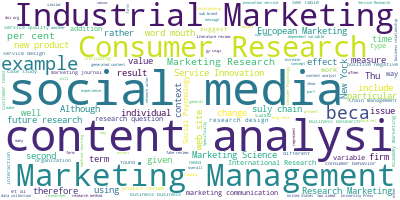

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(dataf['all_paper'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=100000, contour_width=20, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [ ]:
#dataf = pd.read_fwf('combined_fileUP.txt')
infile = "combined_fileUP.txt"
outfile = "cleaned_file.txt"

delete_list = ["Journal", "et al", "e.g.", "used","use", "one", "Vol", "pp"]
with open(infile) as fin, open(outfile, "w+") as fout:
    for line in fin:
        for word in delete_list:
            line = line.replace(word, "")
        fout.write(line)

FileNotFoundError: ignored

In [ ]:
#Tokenize words and Clean-up text
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(dataf['all_paper']))

print(data_words[:1])

[['contents', 'lists', 'available', 'at', 'sciencedirect']]


In [ ]:
# Creating Bigram and Trigram Models
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['contents_lists_available', 'at', 'sciencedirect']


In [ ]:

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['contents_list', 'available', 'sciencedirect']]


In [21]:
# Create the Dictionary and Corpus needed for Topic Modeling
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1)]]


In [22]:
#If you want to see what word a given id corresponds to, pass the id as a key to the dictionary.
id2word[0]

'available'

In [23]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('available', 1), ('contents_list', 1), ('sciencedirect', 1)]]

In [24]:
# Building the Topic Model
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [25]:
# View the topics in LDA model
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.090*"model" + 0.065*"negative" + 0.046*"word" + 0.039*"communication" + '
  '0.036*"problem" + 0.028*"strong" + 0.023*"comment" + 0.022*"estimate" + '
  '0.022*"like" + 0.020*"behavioral"'),
 (1,
  '0.088*"provide" + 0.080*"company" + 0.059*"engagement" + 0.050*"increase" + '
  '0.039*"researcher" + 0.038*"solution" + 0.028*"great" + 0.025*"science" + '
  '0.024*"post" + 0.024*"lead"'),
 (2,
  '0.088*"knowledge" + 0.044*"resource" + 0.043*"relate" + 0.032*"area" + '
  '0.026*"activity" + 0.024*"require" + 0.024*"orientation" + 0.022*"interest" '
  '+ 0.019*"contain" + 0.018*"maintain"'),
 (3,
  '0.060*"give" + 0.039*"effect" + 0.036*"follow" + 0.033*"perspective" + '
  '0.033*"text" + 0.032*"cost" + 0.028*"classification" + 0.028*"select" + '
  '0.025*"tag" + 0.021*"sell"'),
 (4,
  '0.088*"category" + 0.064*"content" + 0.053*"need" + 0.049*"method" + '
  '0.036*"publish" + 0.032*"large" + 0.031*"scale" + 0.024*"note" + '
  '0.021*"com" + 0.019*"describe"'),
 (5,
  '0.179*"bra

In [26]:
# Compute Model Perplexity and Coherence Score

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.966154412707503

Coherence Score:  0.27615884808825963


In [28]:
# Visualize the topics-keywords
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.292193  0.348552       1        1  14.475779
13     0.084169  0.029760       2        1   5.900850
12    -0.105363 -0.027990       3        1   5.732195
16    -0.056961 -0.024720       4        1   5.673466
7     -0.001860  0.000385       5        1   5.415829
5     -0.230017 -0.296967       6        1   4.839500
15     0.068145  0.046460       7        1   4.820685
4      0.096921  0.024741       8        1   4.599427
17     0.064229  0.000806       9        1   4.502392
0      0.056747  0.027662      10        1   4.406346
10     0.042983  0.009148      11        1   4.403303
11     0.072875  0.005940      12        1   4.352291
19     0.069639  0.006771      13        1   4.077999
8      0.052997  0.008709      14        1   3.970876
3      0.102934  0.017559      15        1   3.952998
14     0.105380  0.019717      16        1   3.915754
1     -0.092854 -0.078312      17        1   3.884368
18     0.069096 -0.001047      18        1   3.845866
2     -0.072094 -0.068916      19        1   3.811783
6     -0.034774 -0.048258      20        1   3.418294, topic_info=            Term          Freq         Total Category  logprob  loglift
5      marketing  51612.000000  51612.000000  Default  30.0000  30.0000
11         brand  44082.000000  44082.000000  Default  29.0000  29.0000
29      research  44587.000000  44587.000000  Default  28.0000  28.0000
527     customer  36598.000000  36598.000000  Default  27.0000  27.0000
105     consumer  34498.000000  34498.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
1111       guide   1425.183709   1426.110362  Topic20  -4.8067   3.3754
3640        half   1425.164550   1426.091203  Topic20  -4.8067   3.3754
1857  oortunitie   1379.733819   1380.660472  Topic20  -4.8391   3.3754
3109      formal   1298.140995   1299.067648  Topic20  -4.9000   3.3753
3368   editorial   1285.656251   1286.582904  Topic20  -4.9097   3.3753

[632 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1788     14  0.999610   ability
1426      7  0.999521      able
1297      4  0.999754  academic
774      17  0.999554    access
1798      4  0.999471    accord
...     ...       ...       ...
151       2  0.999918      work
36       15  0.999482     world
1387      4  0.999860     would
2453     13  0.999629     write
421       1  0.999919      year

[628 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 14, 13, 17, 8, 6, 16, 5, 18, 1, 11, 12, 20, 9, 4, 15, 2, 19, 3, 7])

In [35]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2022-04-22 00:10:38--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2022-04-22 00:10:38--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  11.1MB/s    in 1.4s    

2022-04-22 00:10:40 (11.1 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.

In [38]:
import zipfile
from google.colab import files

uploaded = files.upload()

Saving mallet-2.0.8.zip to mallet-2.0.8 (1).zip


In [39]:
path_to_zip_file = list(uploaded.keys())[0]

print ('Extracting',path_to_zip_file)

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
  zip_ref.extractall('.')

print()
print('Here is a directory listing (you should see a directory with your corpus):')
!ls -l

Extracting mallet-2.0.8.zip

Here is a directory listing (you should see a directory with your corpus):
total 113544
-rw-r--r--  1 root root 83876359 Apr 21 19:23  cleaned_file.txt
drwx------  6 root root     4096 Apr 21 23:57  drive
drwxr-xr-x 10 root root     4096 Nov 14  2016  mallet-2.0.8
-rw-r--r--  1 root root 16184794 Apr 22 00:13 'mallet-2.0.8 (1).zip'
-rw-r--r--  1 root root 16184794 Nov 14  2016  mallet-2.0.8.zip
drwxr-xr-x  1 root root     4096 Apr 19 14:23  sample_data


In [40]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.wrappers import LdaMallet
from gensim.models.coherencemodel import CoherenceModel
from gensim import similarities

import os.path
import re
import glob

import nltk
nltk.download('stopwords')

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet' # you should NOT need to change this 
corpus_path = 'transcripts' # you need to change this path to the directory containing your corpus of .txt files

In [43]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
#mallet_path = '/content/drive/MyDrive/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [44]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

[(13,
  [('model', 0.08344267955801105),
   ('table', 0.06102814226519337),
   ('show', 0.04325794198895028),
   ('base', 0.03587707182320442),
   ('result', 0.03290314226519337),
   ('category', 0.02715814917127072),
   ('figure', 0.02199585635359116),
   ('test', 0.021426104972375692),
   ('report', 0.01733857044198895),
   ('estimate', 0.017118439226519337)]),
 (8,
  [('content', 0.09954652426158125),
   ('analysis', 0.09844744337845718),
   ('datum', 0.06400677906376767),
   ('text', 0.04673191235878699),
   ('category', 0.03817837831035192),
   ('code', 0.028034952450069428),
   ('set', 0.023244302188513345),
   ('unit', 0.01946044357562054),
   ('analyze', 0.016805030602271155),
   ('analyst', 0.015932477840096316)]),
 (16,
  [('review', 0.08685402135775515),
   ('effect', 0.055951541513393196),
   ('term', 0.04431266937957166),
   ('positive', 0.04296188056987996),
   ('word', 0.0422907339285866),
   ('negative', 0.03286069884205966),
   ('post', 0.029003729536399087),
   ('movi

In [45]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.3194984096029857


#How to find the optimal number of topics for LDA?

In [46]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [48]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

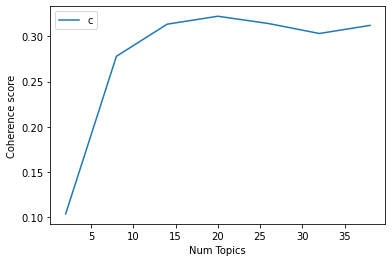

In [52]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [50]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.1039
Num Topics = 8  has Coherence Value of 0.2778
Num Topics = 14  has Coherence Value of 0.3133
Num Topics = 20  has Coherence Value of 0.3221
Num Topics = 26  has Coherence Value of 0.314
Num Topics = 32  has Coherence Value of 0.303
Num Topics = 38  has Coherence Value of 0.312


In [53]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.105*"study" + 0.053*"provide" + 0.040*"case" + 0.040*"method" + '
  '0.036*"follow" + 0.034*"good" + 0.033*"question" + 0.028*"researcher" + '
  '0.026*"suggest" + 0.022*"finding"'),
 (1,
  '0.068*"category" + 0.066*"base" + 0.040*"level" + 0.037*"group" + '
  '0.036*"identify" + 0.036*"difference" + 0.034*"dimension" + 0.029*"author" '
  '+ 0.025*"order" + 0.021*"account"'),
 (2,
  '0.166*"consumer" + 0.048*"online" + 0.041*"behavior" + 0.038*"purchase" + '
  '0.024*"attitude" + 0.021*"internet" + 0.019*"influence" + 0.019*"list" + '
  '0.018*"direct" + 0.017*"psychology"'),
 (3,
  '0.203*"marketing" + 0.090*"research" + 0.076*"management" + '
  '0.035*"industrial" + 0.032*"search" + 0.023*"science" + 0.023*"journal" + '
  '0.020*"publish" + 0.016*"area" + 0.016*"select"'),
 (4,
  '0.055*"measure" + 0.043*"item" + 0.036*"response" + 0.035*"construct" + '
  '0.033*"factor" + 0.033*"scale" + 0.032*"test" + 0.024*"reliability" + '
  '0.018*"validity" + 0.018*"score"'),
 (5,
  '

18. Finding the dominant topic in each sentence

In [54]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,16.0,0.0865,"advertising, issue, role, ad, advertisement, c...",Contents lists available at ScienceDirect
1,1,3.0,0.1038,"marketing, research, management, industrial, s...",Industrial Marketing Management
2,2,12.0,0.1019,"experience, people, view, consumption, action,...",journal homepage: www.elsevier.com/locate/indm...
3,3,0.0,0.0500,"study, provide, case, method, follow, good, qu...",Research paper
4,4,7.0,0.1082,"social, firm, medium, network, industry, compa...",B2B brands on Twitter: Engaging rs with a vary...
5,5,7.0,0.0702,"social, firm, medium, network, industry, compa...","objectives, strategies, and tactics"
6,6,0.0,0.0500,"study, provide, case, method, follow, good, qu...","Mari Juntunenᵃ,⁎, Elvira Ismagilovaᵇ, Eeva-Lii..."
7,7,0.0,0.0500,"study, provide, case, method, follow, good, qu...","ᵃ Department of Marketing, Management and Inte..."
8,8,0.0,0.0500,"study, provide, case, method, follow, good, qu...","of Oulu, P.O. Box 4600, 90014, Finland"
9,9,0.0,0.0500,"study, provide, case, method, follow, good, qu...","ᵇ School of Management, University of Bradford..."


#19. Find the most representative document for each topic

In [77]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head(60)

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.1647,"study, provide, case, method, follow, good, qu...",modifications to conventional spelling or usag...
1,1.0,0.1761,"category, base, level, group, identify, differ...",Data Type Cluster Cluster C...
2,2.0,0.1791,"consumer, online, behavior, purchase, attitude...","rebellion (Chatzidakis ., 2012), tattoo parlou..."
3,3.0,0.1750,"marketing, research, management, industrial, s...",second four search queries in Table 1 are broa...
4,4.0,0.2083,"measure, item, response, construct, factor, sc...",Observed score True score Measure-induced ...
5,5.0,0.2177,"model, result, table, make, variable, show, de...",includes the hypothesized variables prior make...
6,6.0,0.1619,"service, product, design, process, quality, te...",development of both process and product techno...
7,7.0,0.2065,"social, firm, medium, network, industry, compa...","indignant, irate, irritated, offended, ratty, ..."
8,8.0,0.1949,"customer, high, sale, price, low, reference, o...",High competition and high cooperation; high co...
9,9.0,0.1885,"brand, knowledge, find, significant, effect, p...",Brand Full brand mention Associative ...


# Topic distribution across documents

In [61]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,16.0,"advertising, issue, role, ad, advertisement, c...",223609.0,0.1999
1.0,3.0,"marketing, research, management, industrial, s...",51366.0,0.0459
2.0,12.0,"experience, people, view, consumption, action,...",63555.0,0.0568
3.0,0.0,"study, provide, case, method, follow, good, qu...",64478.0,0.0577
4.0,7.0,"social, firm, medium, network, industry, compa...",56480.0,0.0505
...,...,...,...,...
1118383.0,3.0,"marketing, research, management, industrial, s...",NaN,NaN
1118384.0,3.0,"marketing, research, management, industrial, s...",NaN,NaN
1118385.0,0.0,"study, provide, case, method, follow, good, qu...",NaN,NaN
1118386.0,0.0,"study, provide, case, method, follow, good, qu...",NaN,NaN


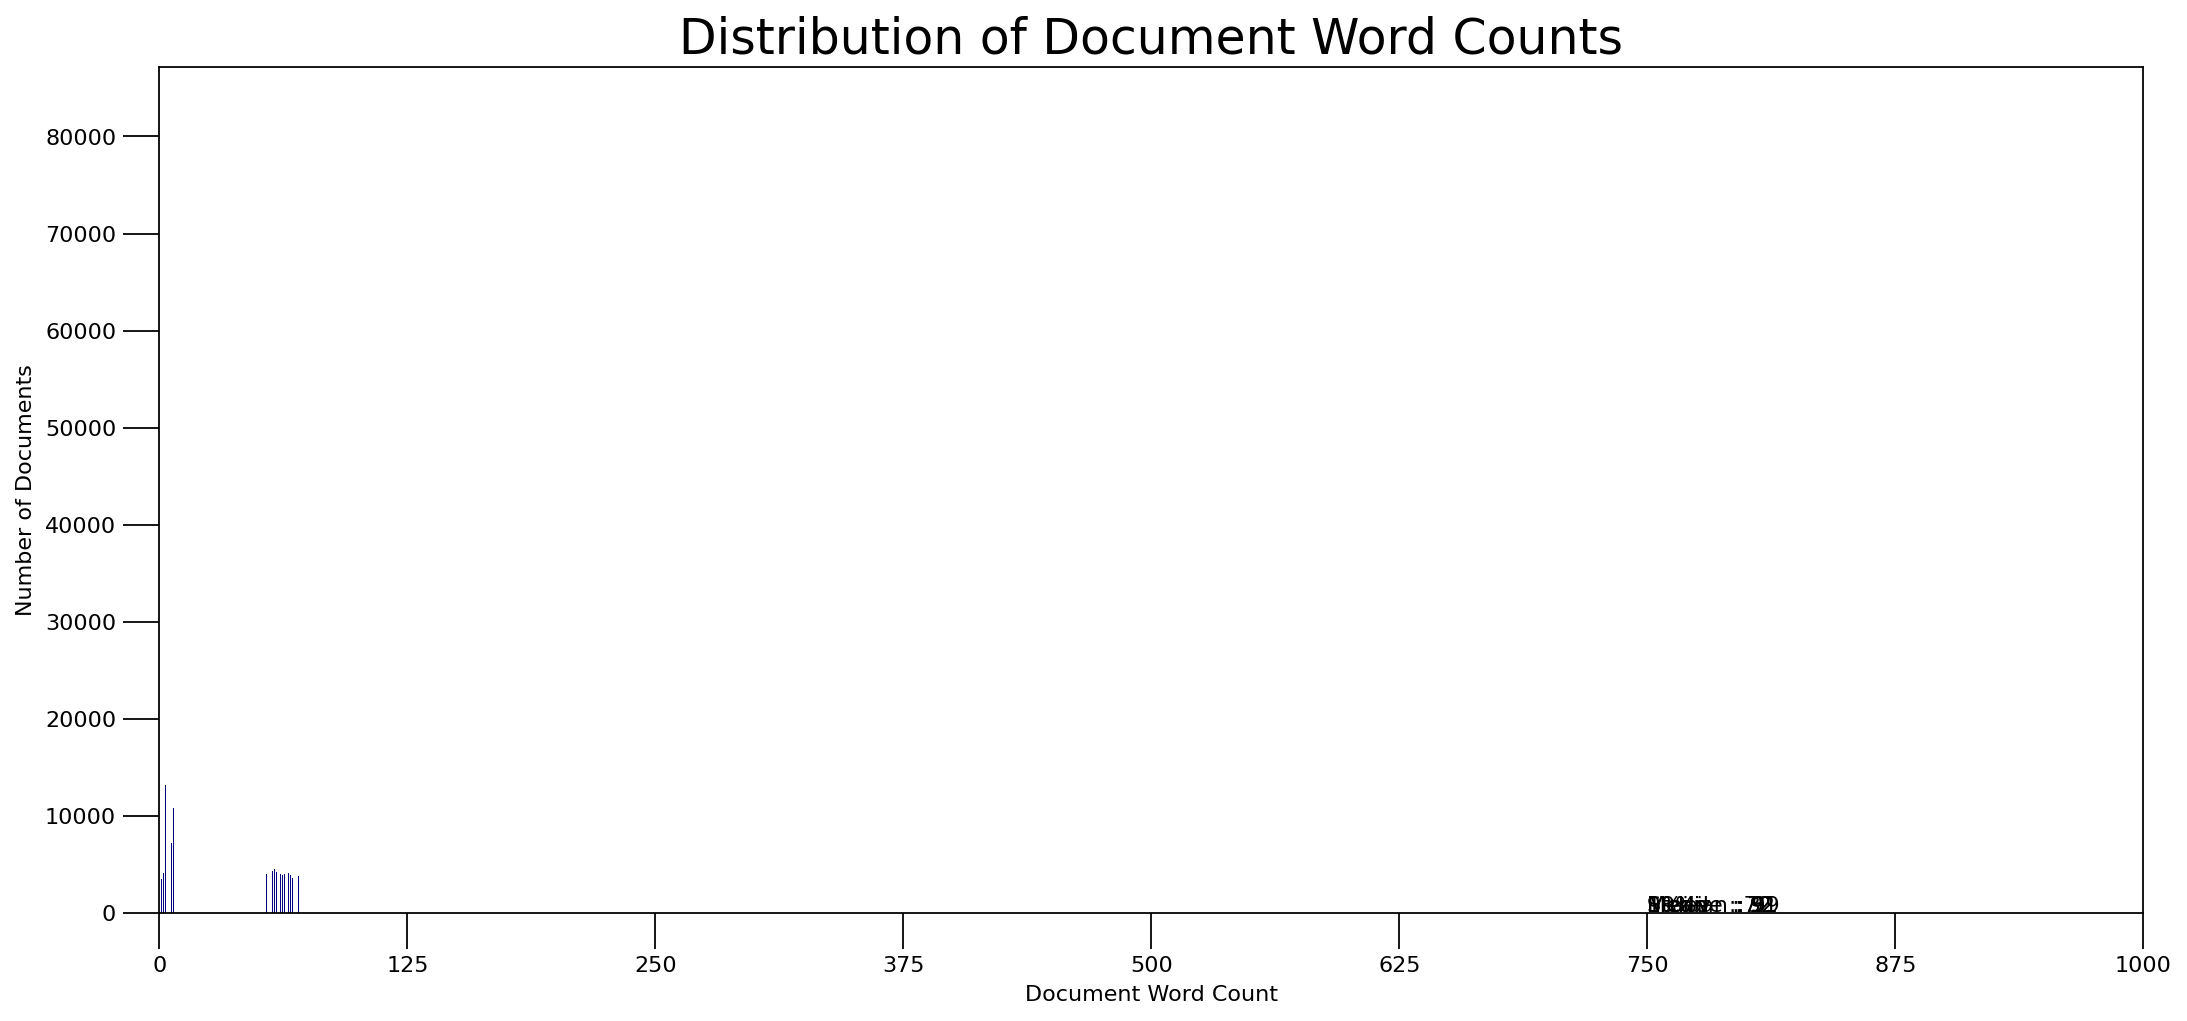

In [63]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

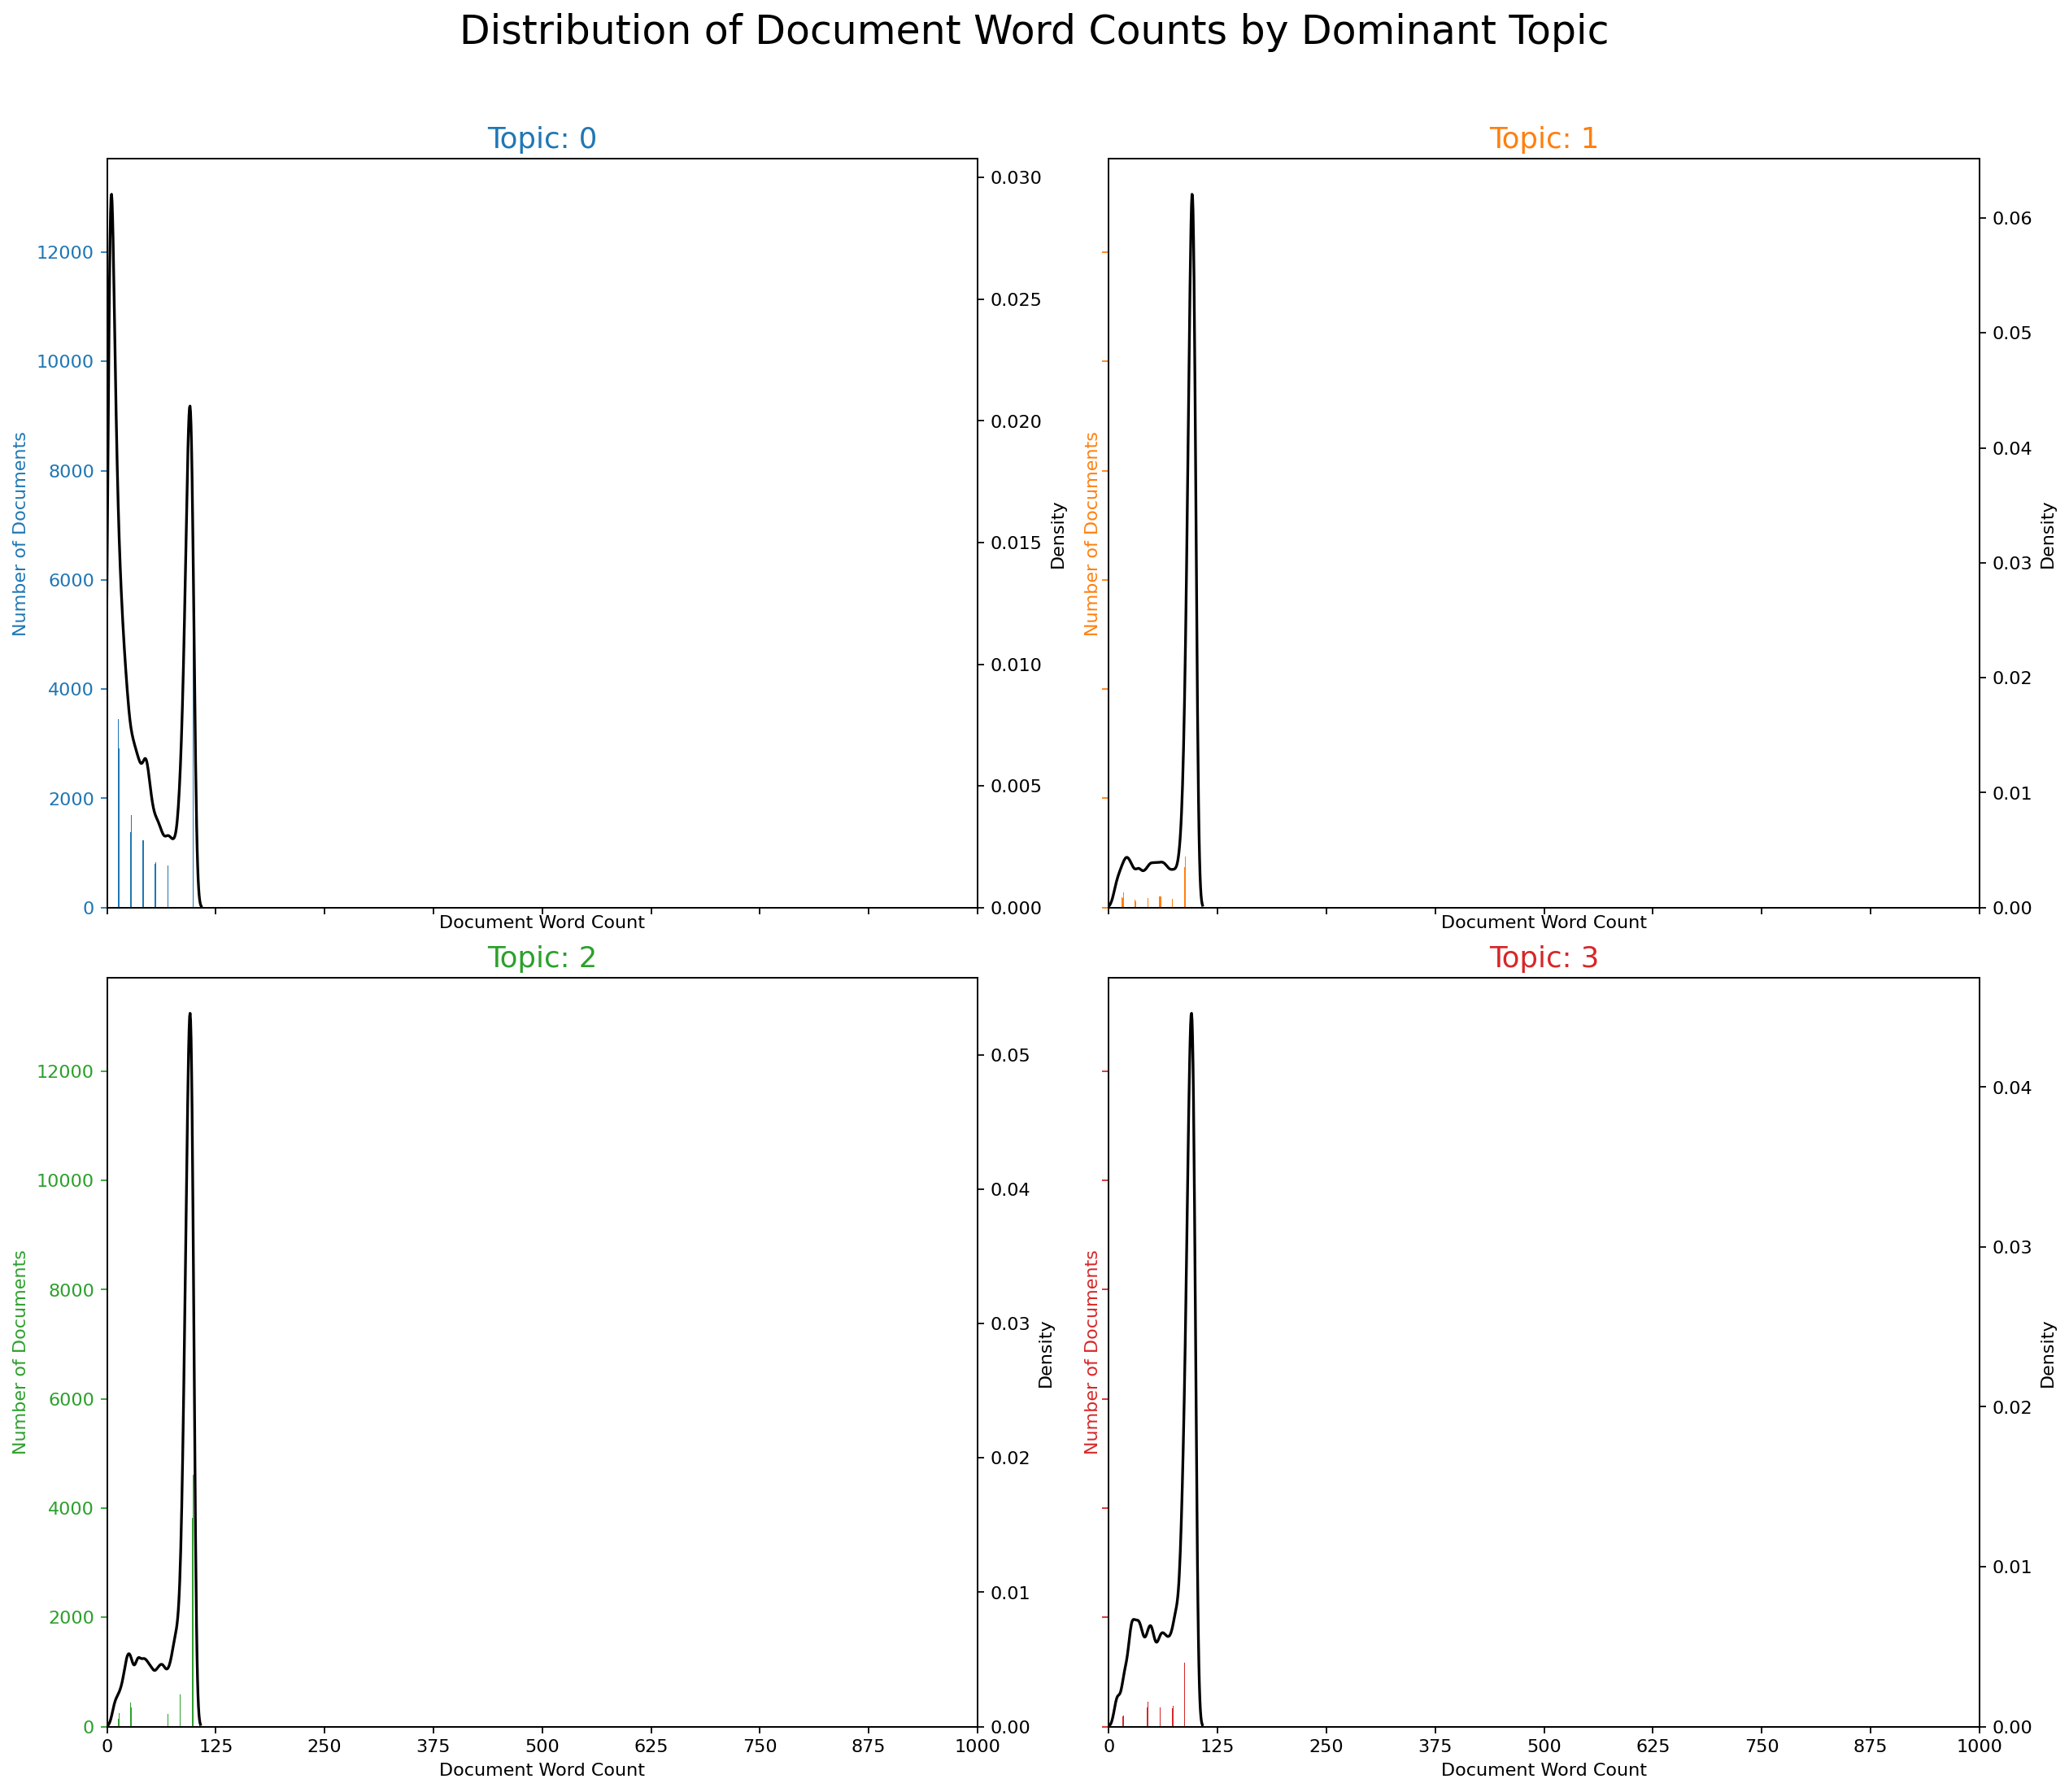

In [64]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

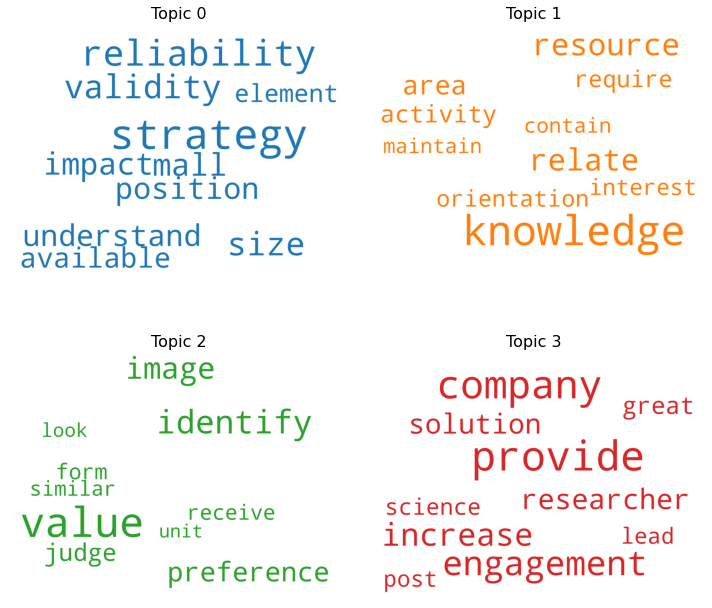

In [65]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [69]:
from collections import Counter

In [70]:
#from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

NameError: ignored

IndexError: ignored

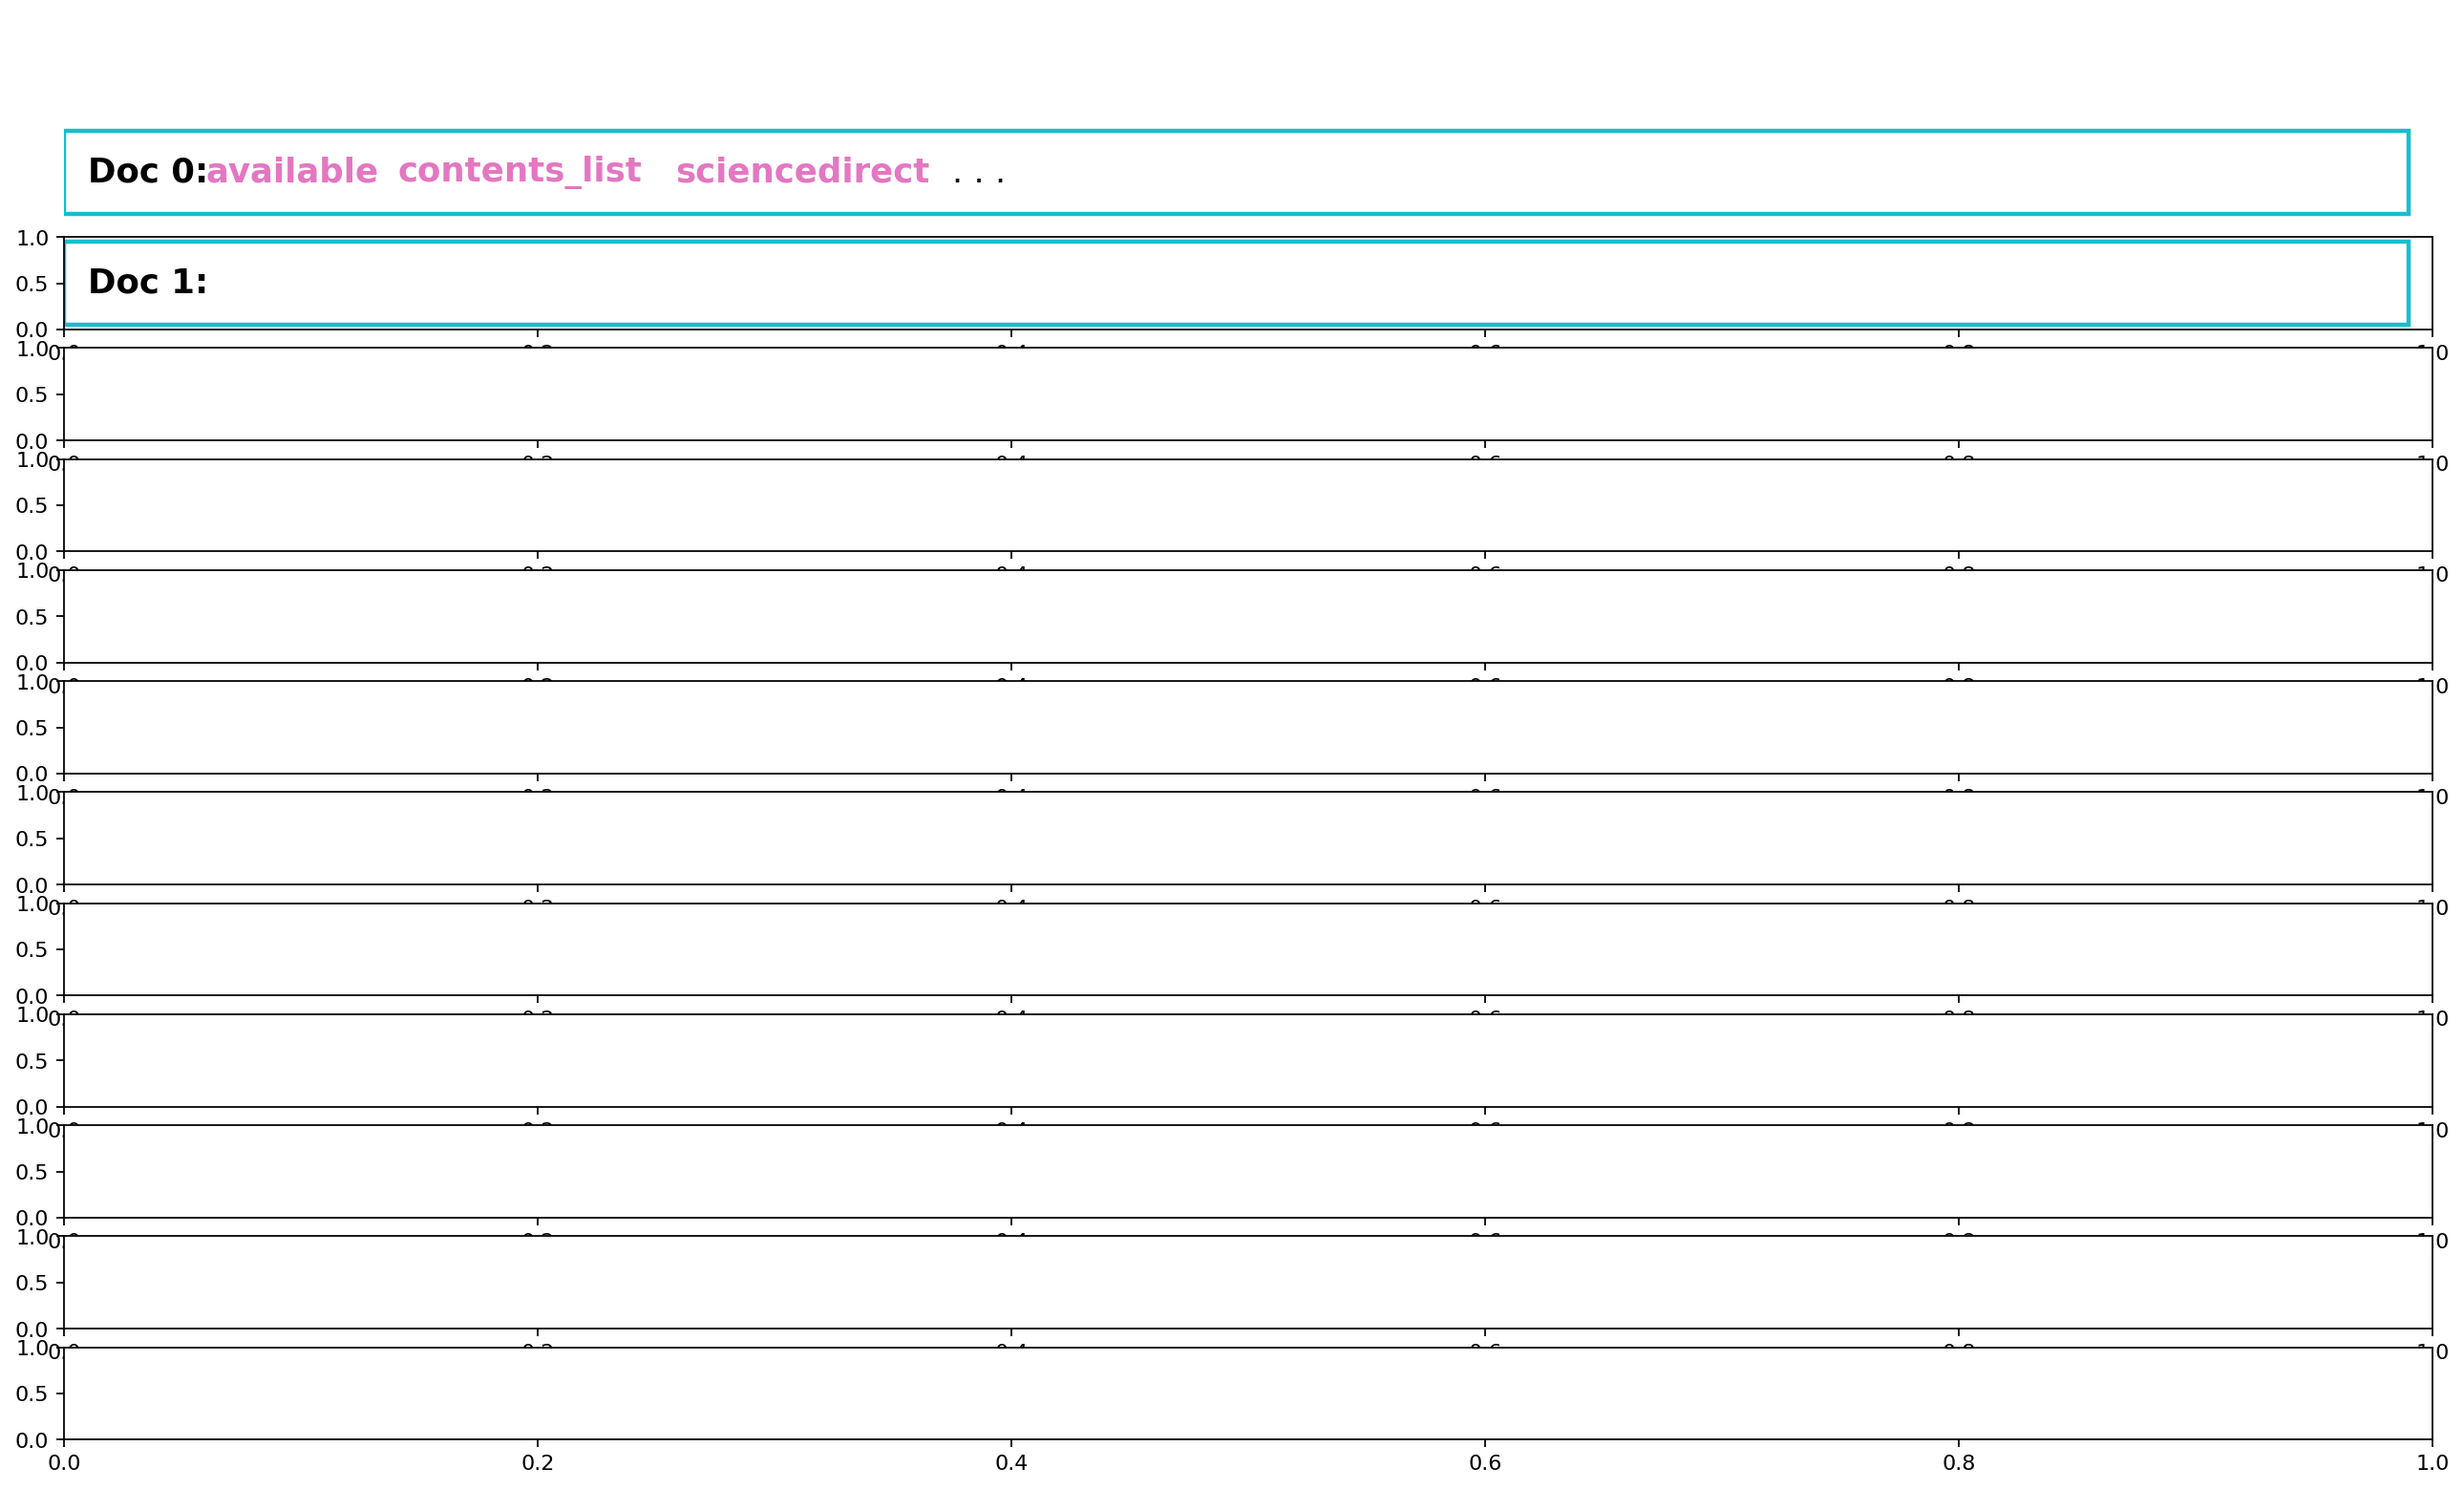

In [71]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()

In [74]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

In [75]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

IndexError: ignored

<Figure size 1200x480 with 2 Axes>

In [76]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


ValueError: ignored